In [12]:
from PIL import Image
import numpy.random as rd
import numpy as np
import math

from skimage.draw import polygon, circle, set_color
from scipy.spatial import distance, ConvexHull
from IPython import display

In [13]:
initial_image = Image.open('gradient.jpg')
mean_color = initial_image.resize((1, 1), Image.ANTIALIAS).getpixel((0, 0))
parsed_image = np.array(initial_image)


WIDTH, HEIGHT, DEPTH = parsed_image.shape
DIMENSIONS_PRODUCT = WIDTH * HEIGHT * DEPTH

current_generation = 0
target_vector = parsed_image.reshape(DIMENSIONS_PRODUCT)
print('Given picture {0}x{1} with depth {2}. Mean color is {3}'.format(WIDTH, HEIGHT, DEPTH, mean_color))


Given picture 512x512 with depth 3. Mean color is (112, 25, 99)


In [14]:
GENERATION_LIMIT = 20000

In [15]:
def generate_random_polygon():
    img = np.zeros((WIDTH, HEIGHT, DEPTH), dtype=np.uint8)
    
    points = np.random.rand(30, 2)
    size_ratio = rd.randint(10, 30)
    hull = ConvexHull(points)
    shiftX = rd.randint(0, WIDTH) // size_ratio * (size_ratio - 1)
    shiftY = rd.randint(0, WIDTH) // size_ratio * (size_ratio - 1)
    return polygon(
        [shiftX + x * WIDTH / size_ratio for x in points[hull.vertices,0]], 
        [shiftY + x * HEIGHT / size_ratio for x in points[hull.vertices,1]]
    )
    
    # r = np.zeros(sides, dtype=np.uint8)
    # c = np.zeros(sides, dtype=np.uint8)
    # shiftX = rd.randint(0, WIDTH) // 10 * 9
    # shiftY = rd.randint(0, WIDTH) // 10 * 9
    # for i in range(0, sides):
    #     r[i] = shiftX + rd.randint(0, WIDTH // 10)
    #     c[i] = shiftY + rd.randint(0, WIDTH // 10)

    # r = np.array([rd.randint(0, WIDTH) // 10 * 9 + rd.randint(0, WIDTH // 10) for i in range(0, rd.randint(3, 5))])
    # c = np.array([rd.randint(0, WIDTH) // 10 * 9 + rd.randint(0, WIDTH // 10) for i in range(0, rd.randint(3, 5))])
    # return polygon(r, c)


In [16]:
def generate_random_circle():
    x = rd.randint(0, WIDTH)
    y = rd.randint(0, HEIGHT)
    r = rd.normal(5, 1)
    return circle(x, y, r)


In [17]:
def mutate(image):
    new_image = image.copy()
    # rr, cc = generate_random_polygon() if current_generation % 3 == 0 else generate_random_circle()
    rr, cc = generate_random_polygon()
    r = rd.randint(0, 256)
    g = rd.randint(0, 256)
    b = rd.randint(0, 256)
    set_color(new_image, (rr, cc), (r, g, b), 0.5)
    return new_image


In [18]:
def fitness_function(current, target):
    return distance.euclidean(current, target)

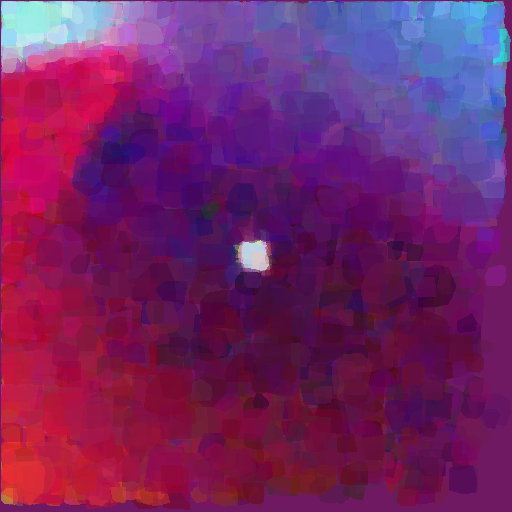

2311 14321.01


In [ ]:
fitnesses = []
current_image = np.tile(mean_color, (WIDTH, HEIGHT, 1))
while current_generation < GENERATION_LIMIT:
    mutated_image = mutate(current_image)
    current_fitntess = fitness_function(target_vector, current_image.reshape(DIMENSIONS_PRODUCT))
    mutated_fitntess = fitness_function(target_vector, mutated_image.reshape(DIMENSIONS_PRODUCT))
    if mutated_fitntess < current_fitntess:
        current_image = mutated_image.copy()
        current_generation += 1
        fitnesses.append(mutated_fitntess)
        if math.log(current_generation, 2) % 1 == 0:
#             print(current_generation, f'./output/{current_generation}.jpg')
            Image.fromarray(np.uint8(current_image.reshape(WIDTH, HEIGHT, DEPTH))).save(f'./output/{current_generation}.jpg')
        
    display.clear_output(wait=True)
    display.display(Image.fromarray(np.uint8(mutated_image.reshape(WIDTH, HEIGHT, DEPTH))))
    print(current_generation, format(current_fitntess, '.2f'))


In [ ]:
Image.fromarray(np.uint8(current_image.reshape(WIDTH, HEIGHT, DEPTH))).save('finished.jpg')